In [1]:
import sys; print('Python \t\t{0[0]}.{0[1]}'.format(sys.version_info))
import tensorflow as tf; print('Tensorflow \t{}'.format(tf.__version__))
import keras; print('Keras \t\t{}'.format(keras.__version__))

Python 		3.6
Tensorflow 	1.0.0


Using TensorFlow backend.


Keras 		2.0.3


In [2]:
%matplotlib inline 

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np

In [3]:
#linear regression, with additive noise
f = lambda x, e: 2*x + 3 + e
f_vec =  np.vectorize(f)

In [4]:
samples = 1000
e_data = np.random.normal(0.0, 0.2, samples)
x_data = np.random.rand(samples)
y_data = f_vec(x_data,e_data)

# transform into columns
x_data = x_data.reshape(-1,1)
y_data = y_data.reshape(-1,1)

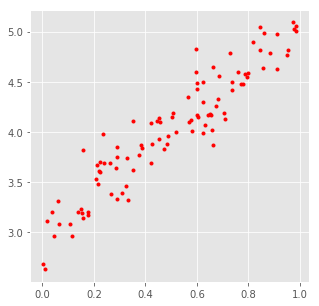

In [5]:
plt.figure(figsize=(5,5))
plt.plot(x_data[:100], y_data[:100], 'r.')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.01, random_state=42)

In [7]:
import tensorflow as tf
import tensorlayer as tl

In [8]:
# Set parameters
training_iteration = 5
batch_size = 5
display_step = 1
learning_rate = 0.01

FLAGS = None

In [9]:
# TF graph input
x = tf.placeholder('float', [None, 1]) 
y = tf.placeholder('float', [None,1]) 

In [10]:
network = tl.layers.InputLayer(x, name='input_layer')
network = tl.layers.DenseLayer(network, n_units=1, act=tf.identity, name='output_layer')

y_hat = network.outputs

  [TL] InputLayer  input_layer: (?, 1)
  [TL] DenseLayer  output_layer: 1 identity


In [11]:
cost = tf.reduce_sum(tf.pow(y_hat-y,2))

In [12]:
train_params = network.all_params

with tf.name_scope("train") as scope:
    # Gradient descent
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    learn     = optimizer.minimize(cost, var_list=train_params)

In [13]:
# Initializing the variables
init = tf.global_variables_initializer()

# Merge all summaries into a single operator
merged_summary_op = tf.summary.merge_all()

In [14]:
# Launch the graph
sess = tf.InteractiveSession()
sess.run(init)

In [15]:
# Logs and graph for tensorboard
summary_writer = tf.summary.FileWriter('./tensorboard', graph=sess.graph)

In [16]:
# Test the model, Calculate accuracy
mse= tf.reduce_mean(tf.pow(y_hat-y,2))

In [17]:
# train the network
tl.utils.fit(sess, network, learn, cost, x_train, y_train, x, y,
             acc=mse, batch_size=5, n_epoch=5, print_freq=1, 
             X_val=x_test, y_val=y_test, eval_train=False)


Start training the network ...
Epoch 1 of 5 took 0.110046s
   val loss: 0.262985
   val acc: 0.052597
Epoch 2 of 5 took 0.081643s
   val loss: 0.227078
   val acc: 0.045416
Epoch 3 of 5 took 0.086396s
   val loss: 0.244856
   val acc: 0.048971
Epoch 4 of 5 took 0.078172s
   val loss: 0.255855
   val acc: 0.051171
Epoch 5 of 5 took 0.078498s
   val loss: 0.261709
   val acc: 0.052342
Total training time: 0.441933s


In [18]:
# evaluation
tl.utils.test(sess, network, mse, x_test, y_test, x, y, batch_size=None)

Start testing the network ...
   test acc: 0.052342


In [19]:
w_ = network.all_params[0].eval()[0][0]
b_ = network.all_params[1].eval()[0]
print("Regression a = {:.2}, b = {:.2}".format(w_, b_))

Regression a = 2.0, b = 3.0


In [20]:
y_test_predict = sess.run(y_hat, feed_dict={x:x_test})
np.hstack([x_test[:10], y_test_predict[:10]])

array([[ 0.66798525,  4.31360817],
       [ 0.65917663,  4.29585552],
       [ 0.55946627,  4.09489727],
       [ 0.4925937 ,  3.96012115],
       [ 0.9452741 ,  4.87246084],
       [ 0.15314049,  3.2759819 ],
       [ 0.89588   ,  4.77291107],
       [ 0.02567681,  3.01908946],
       [ 0.2760092 ,  3.52361345],
       [ 0.59691542,  4.17037296]])

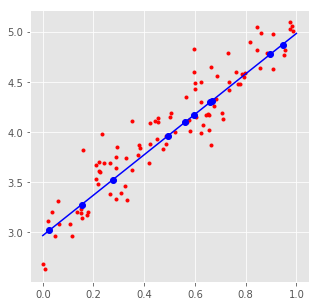

In [21]:
plt.figure(figsize=(5,5))
plt.plot(x_data[:100], y_data[:100], 'r.')
plt.plot(x_test, y_test_predict, 'bo')
plt.plot([b_,w_*1+b_], 'b-')
plt.show()

In [ ]:
# Close the Session when we're done.
sess.close()